In [339]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [340]:
data2 = pd.read_csv('kc_house_data.csv')

1. Изучите стоимости недвижимости 

2. Изучите распределение квадратуры жилой площади 

3. Изучите распределение года постройки 

- Постройте график 
- Назовите график 
- Сделайте именование оси x и оси y 
- Сделайте выводы 

In [341]:
data2.price.describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [342]:
prices = data2['price'][data2['price'] < 1200000]

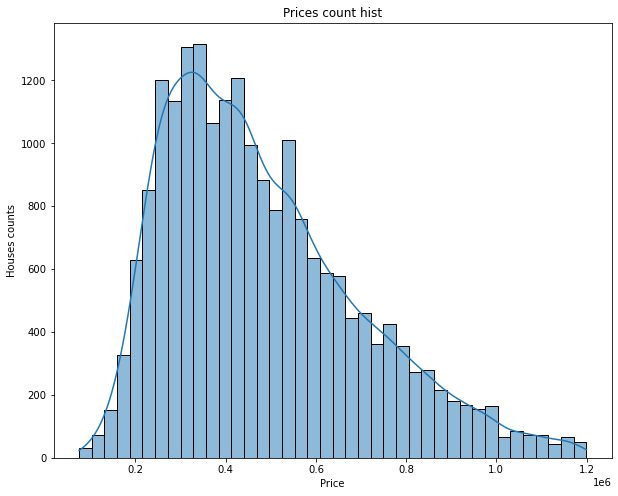

In [343]:
plt.figure(figsize=(10, 8))
sns.histplot(prices, bins=40, kde=True)
plt.title('Prices count hist')
plt.xlabel('Price')
plt.ylabel('Houses counts')
plt.show()

In [344]:
sqft_living = data2['sqft_living'][data2['sqft_living'] < 6000]

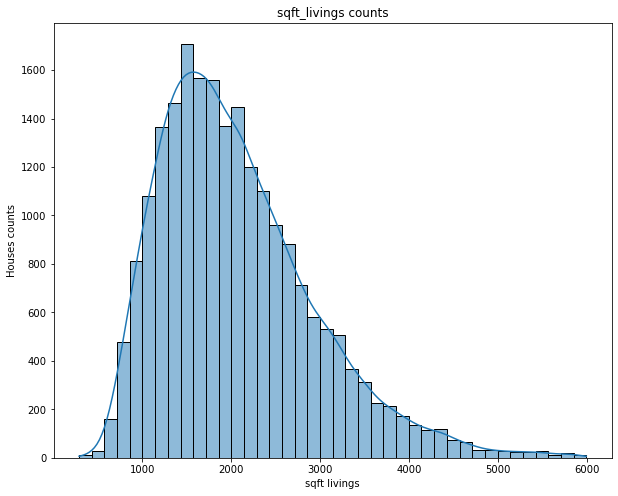

In [345]:
plt.figure(figsize=(10, 8))
sns.histplot(sqft_living, bins=40, kde=True)
plt.title('sqft_livings counts')
plt.xlabel('sqft livings')
plt.ylabel('Houses counts')
plt.show()

In [346]:
yr_built = data2['yr_built']

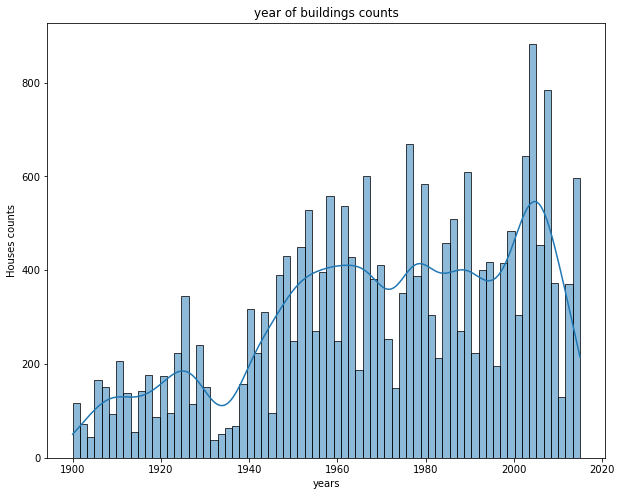

In [347]:
plt.figure(figsize=(10, 8))
sns.histplot(yr_built, bins=70, kde=True)
plt.title('year of buildings counts')
plt.xlabel('years')
plt.ylabel('Houses counts')
plt.show()

- Данные площади и цены содержат выбросы, для гистограммы были взяты отсечки:

< 1200000 для цены недвижмости

< 6000 sq_ft для квадратуры жилой недвижимости

Таким образом, в данные графики не попали самые дорогие и крупные объекты

2 Задание

Изучите распределение домов от наличия вида на набережную

Изучите распределение этажей домов

Изучите распределение состояния домов

- Постройте график
- Сделайте выводы

In [348]:
prices_water = data2[['price','waterfront', 'id']][data.price < 1200000]

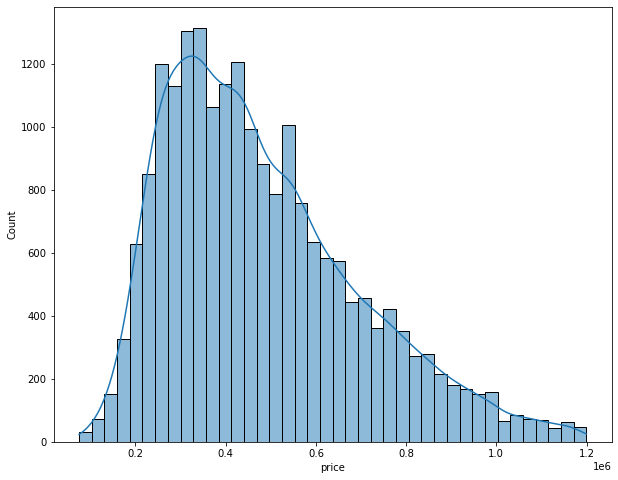

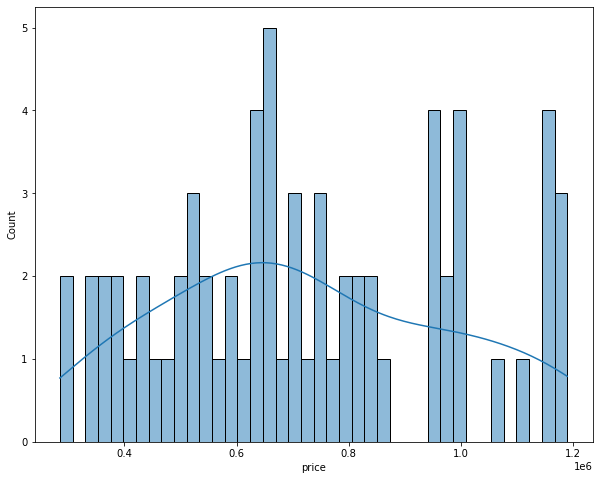

In [349]:
plt.figure(figsize=(10, 8))
sns.histplot(data=prices_water[prices_water.waterfront==0], x='price', bins=40, kde=True)
plt.show()
plt.figure(figsize=(10, 8))
sns.histplot(data=prices_water[prices_water.waterfront==1], x='price', bins=40, kde=True)
plt.show()

Распределение цены домов с видом на воду близко к линейному

In [350]:
data2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


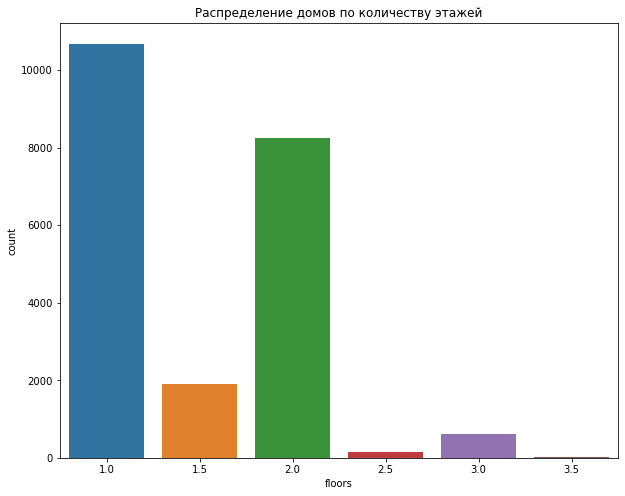

In [351]:
plt.figure(figsize=(10, 8))
sns.countplot(data2['floors'])
plt.title('Распределение домов по количеству этажей')
plt.show()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


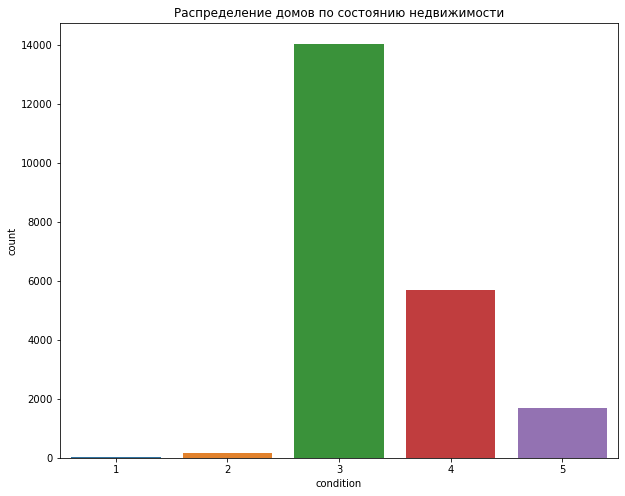

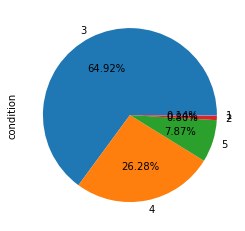

In [352]:
plt.figure(figsize=(10, 8))
sns.countplot(data2['condition'])
plt.title('Распределение домов по состоянию недвижимости')
plt.show()
data2['condition'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.show()

In [353]:
data2['condition'].value_counts()/len(data2['condition']) * 100

3    64.919262
4    26.275852
5     7.870263
2     0.795817
1     0.138805
Name: condition, dtype: float64

- Больше всего домов - одноэтажные. Также стоит учесть, что есть 'половинные' этажи
- Распределение состояния недвижимости: Доля домов в плохом состоянии (1 и 2 грейд) составляет менее 1%

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

Проведем очистку данных от выбросов:

In [356]:
data2 = data2[(data2['sqft_living'] < 6000)& \
             (data2['price'] < 1200000)&(data2['price'] > 100000)]

Создадим таблицу взаимных зависимостей (линейных корреляций) признаков.

Отобразим влияние признаков на целевую характеристику 'Price'   

In [357]:
corr = data2.corr()['price']
corr.name = 'Price_corr_table'
corr.index
corr = corr.to_frame()
corr.style.bar(align='mid')

,Price_corr_table
id,0.005038
price,1.000000
bedrooms,0.296873
bathrooms,0.459015
sqft_living,0.628824
sqft_lot,0.093237
floors,0.273475
waterfront,0.064869
view,0.247113
condition,0.034921


In [358]:
plt.show()

Отметим те признаки корреляция которых с целевым наибольшая, отметим порог корреляции на отметке 50%

In [359]:
corr = corr[abs(corr.Price_corr_table) >= 0.5]
corr.style.bar(align='mid')

,Price_corr_table
price,1.000000
sqft_living,0.628824
grade,0.637565
sqft_above,0.535342
sqft_living15,0.571328


In [360]:
plt.show()

Подробнее рассмотрим взаимные зависимости каждого признака.

Построим взаимные распределения каждой из величин.


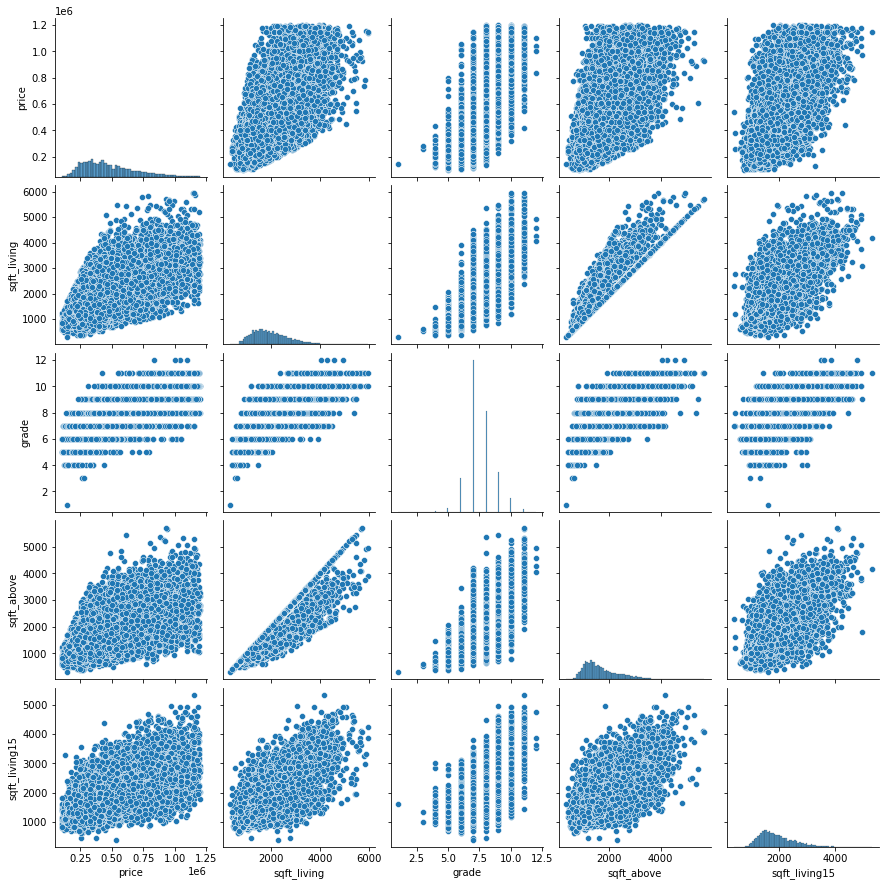

In [361]:
max_corr_data = data2[corr.index]
sns.pairplot(max_corr_data)

Обратим внимание на характеристики, которые имеют очень сильную взаимную корреляцию (сильнее чем на целевую характеристику):
 - sqft_living15 / sqft_living / sqft_above Имеют сильный взаимные корреляции, и по сути являются подмножествами одной переменной sqft_above. Таким образом, можем оставить один из парамеров который имеет наибольший вклад = sqft_living.

In [362]:
max_corr_data = max_corr_data.drop(['sqft_above', 'sqft_living15'], axis=1)

In [363]:
max_corr_data = max_corr_data[max_corr_data['price'] > 10000]
max_corr_data.corr()

,price,sqft_living,grade
price,1.000000,0.628824,0.637565
sqft_living,0.628824,1.000000,0.710547
grade,0.637565,0.710547,1.000000


Рассмотрим подробнее распределение цен от данных параметров

<Figure size 1152x576 with 0 Axes>

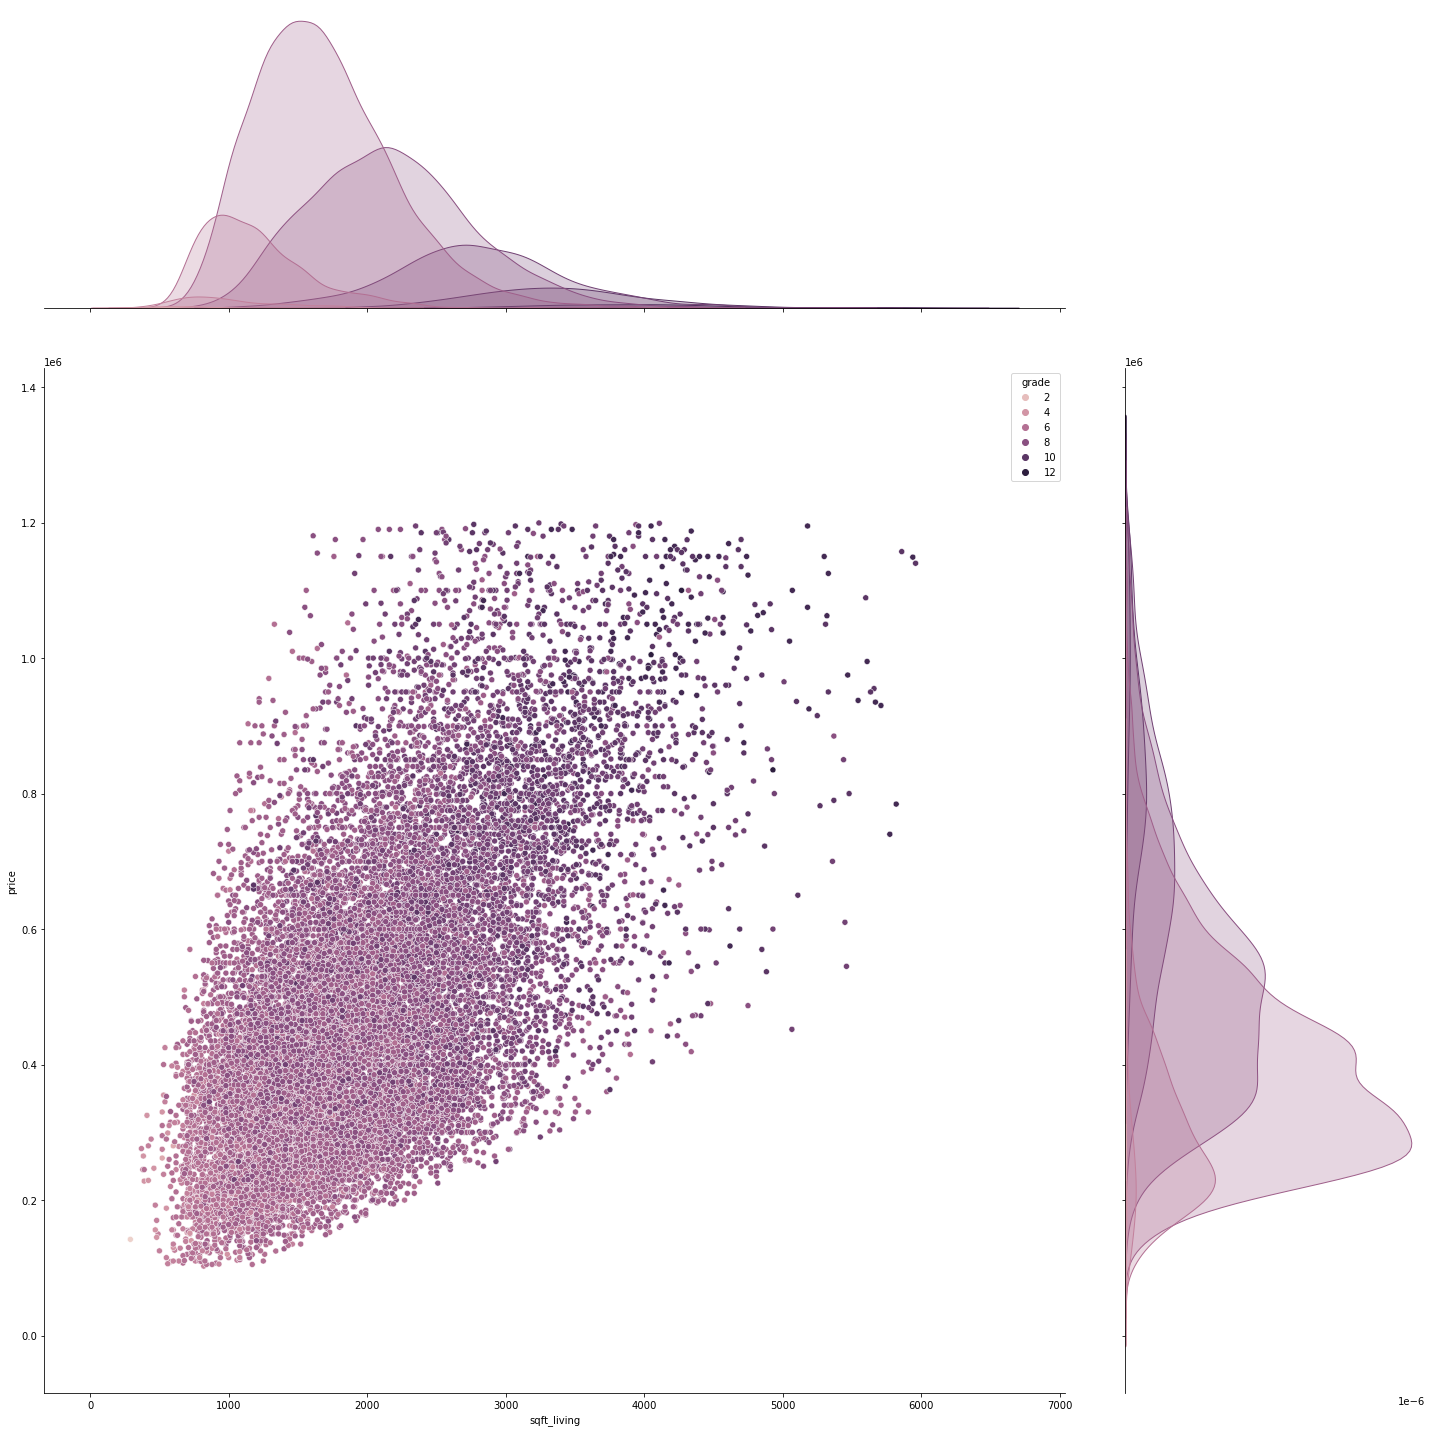

In [365]:
plt.figure(figsize=(16, 8))
sns.jointplot(data = max_corr_data, x = 'sqft_living', y = 'price', hue='grade', ratio=3, height = 20)
plt.xlabel('Жилая площадь объекта')
plt.ylabel('Стоимость объекта')
plt.show()